I IMPORT DATASET GIVEN FROM MY COMPUTER TO COLLAB

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving linearregression_salary.xlsx to linearregression_salary.xlsx


LOAD FILE IN COLLAB USING PANDAS

In [ ]:
import pandas as pd

df = pd.read_excel("linearregression_salary.xlsx")

df.head()


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


CHECK FOR NULL VALUE ETC

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 YearsExperience    0
Salary             0
dtype: int64


CHECK FOR DUPLICATE ROW IF HAVE

In [ ]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


KNOW IMPORT ALL THE REQUIRED LIBRARY FOR LINEAR REGRESSION AND MEAN SQUARE ERROR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


Scatter Plot (Data Visualization) FOR VISUALIZING DATA

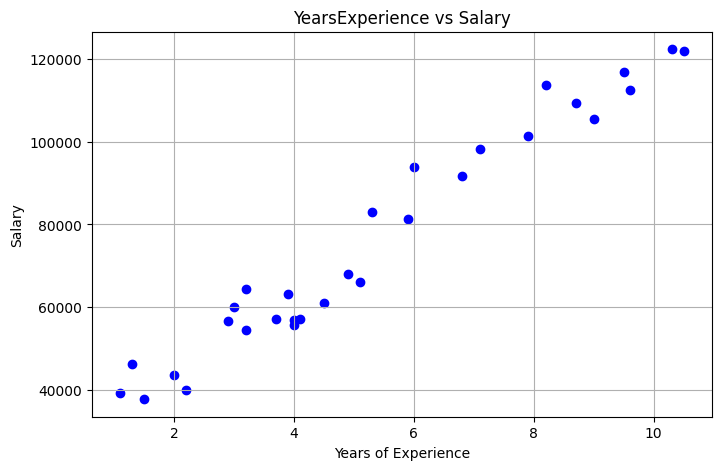

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.title('YearsExperience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


Data Preparation IN WHICH I SEPARTE FEATURE AND TARGET
X INDICATE FEATURE
Y INDICATE SALARY MEANS TARGET

In [ ]:
X = df[['YearsExperience']]
y = df['Salary']

Dataset ko 70% training aur 30% testing mein divide kiya gaya hai using train_test_split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


LinearRegression() object banaya gaya hai aur training data se model ko fit kiya gaya hai.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Testing data pe prediction kiya gaya hai using trained model.

In [ ]:
y_pred = model.predict(X_test)


Model ki performance ko MAE, MSE, slope (coefficient) aur intercept ke zariye evaluate kiya gaya hai. First in kaa object per find

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("Slope (Coefficient):", round(model.coef_[0], 2))
print("Intercept:", round(model.intercept_, 2))



Model Evaluation:
Mean Absolute Error (MAE): 5161.33
Mean Squared Error (MSE): 37784662.47
Slope (Coefficient): 9339.08
Intercept: 25918.44


Is graph mein training aur test data ke points, regression line aur predicted values show ki gayi hain.

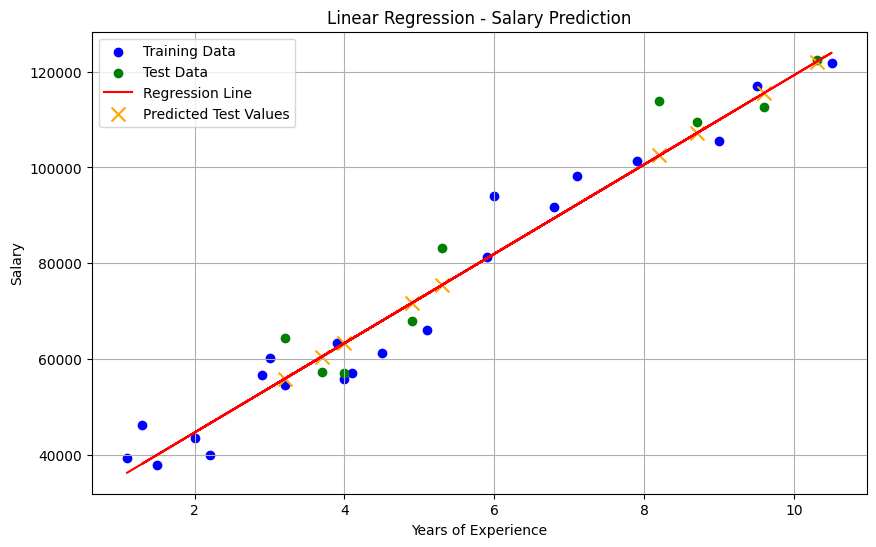

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Test Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.scatter(X_test, y_pred, color='orange', marker='x', s=100, label='Predicted Test Values')
plt.title('Linear Regression - Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


Ek table banayi gayi hai jisme actual salary, predicted salary aur difference (error) diya gaya hai for test data.

In [ ]:
comparison_df = pd.DataFrame({
    'Actual Salary': y_test.values,
    'Predicted Salary': y_pred,
    'Difference': y_test.values - y_pred
})
print("\nActual vs Predicted Salary:")
print(comparison_df.round(2))



Actual vs Predicted Salary:
   Actual Salary  Predicted Salary  Difference
0         112635         115573.62    -2938.62
1          67938          71679.94    -3741.94
2         113812         102498.91    11313.09
3          83088          75415.57     7672.43
4          64445          55803.50     8641.50
5          57189          60473.04    -3284.04
6         122391         122110.98      280.02
7         109431         107168.45     2262.55
8          56957          63274.77    -6317.77
